In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Chuẩn bị dữ liệu**

In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BC PTDL/20190928-reviews.csv')
items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BC PTDL/20190928-items.csv')

In [ ]:
reviews.head()

asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3  I love the phone and all, because I really did...           1.0  
4  The phone has been great for every purpose it ...           1.0

In [ ]:
reviews = reviews[['asin','verified','title','body']]

In [ ]:
items.head()

asin     brand                                              title  \
0  B0000SX2UC     Nokia  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B00198M12M     Nokia  Nokia 6500 Slide Black/silver Unlocked Cell Phone   
4  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Nokia-6500-Slide-silver...   
4  https://www.amazon.com/Motorola-i335-Phone-Boo...   

                                               image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...     2.9   
2  https://m.media-amazon.com/images/I/71b+q3ydkI...     2.6   
3  https://m.media-amazon.com/images/I/41ss4HpLkL...     2.4   
4  https://m.media-amazon.com/images/I/710UO8gdT+...     3.3   

                                           reviewUrl  totalReviews  prices  
0  https://www.amazon.com/product-reviews/B0000SX2UC            14     NaN  
1  https://www.amazon.com/product-reviews/B0009N5L7K             7  $49.95  
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22     NaN  
3  https://www.amazon.com/product-reviews/B00198M12M             5     NaN  
4  https://www.amazon.com/product-reviews/B001AO4OUC            21     NaN

In [ ]:
items = items[['asin','brand','title']]

In [ ]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [ ]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "name_pro", "rating_y": "overall_rating"}, inplace=True)


In [ ]:
reviews.drop(columns=['asin'], inplace=True)


In [ ]:
reviews.head()

verified                                         title  \
0     False                   Def not best, but not worst   
1     False                   Text Messaging Doesn't Work   
2     False                               Love This Phone   
3     False                       Love the Phone, BUT...!   
4     False  Great phone service and options, lousy case!   

                                                body  brand  \
0  I had the Samsung A600 for awhile which is abs...  Nokia   
1  Due to a software issue between Nokia and Spri...  Nokia   
2  This is a great, reliable phone. I also purcha...  Nokia   
3  I love the phone and all, because I really did...  Nokia   
4  The phone has been great for every purpose it ...  Nokia   

                                            name_pro  
0  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
1  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
2  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
3  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
4  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...

In [ ]:
# reviews.to_csv("/content/drive/MyDrive/Colab Notebooks/BC PTDL/merged_reviews.csv", index=False)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82815 entries, 0 to 82814
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   verified  82815 non-null  bool  
 1   title     82805 non-null  object
 2   body      82795 non-null  object
 3   brand     82815 non-null  object
 4   name_pro  82815 non-null  object
dtypes: bool(1), object(4)
memory usage: 3.2+ MB


**Xử lý dữ liệu**


In [ ]:
reviews.isnull().sum()

verified     0
title       10
body        20
brand        0
name_pro     0
dtype: int64

In [ ]:
reviews.dropna(inplace=True)
reviews.isnull().sum()

verified    0
title       0
body        0
brand       0
name_pro    0
dtype: int64

**Làm sạch dữ liệu**

In [ ]:
print(reviews['body'].unique()[:10])

["I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Rece

In [ ]:
# pip install langdetect

# import langdetect

# def detect_language(text):
#     try:
#         return langdetect.detect(text)
#     except:
#         return 'unknown'

# reviews['language'] = reviews['body'].apply(detect_language)

# reviews = reviews[reviews['language'] != 'es']

# reviews.drop('language', axis=1, inplace=True)

In [ ]:
# reviews.to_csv("/content/drive/MyDrive/Colab Notebooks/BC PTDL/langdetected.csv", index=False)

In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BC PTDL/langdetected.csv')


In [ ]:
pip install contractions

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
from textblob import TextBlob
from contractions import contractions_dict

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
reviews

verified                                              title  \
0         False                        Def not best, but not worst   
1         False                        Text Messaging Doesn't Work   
2         False                                    Love This Phone   
3         False                            Love the Phone, BUT...!   
4         False       Great phone service and options, lousy case!   
...         ...                                                ...   
79828      True  International version. Will require USA adapte...   
79829     False  Be careful of International Version if Using T...   
79830     False          Moto G7 Play Freezes Every Time I Use It.   
79831     False                                 Camera is not good   
79832      True                                           Awesome.   

                                                    body     brand  \
0      I had the Samsung A600 for awhile which is abs...     Nokia   
1      Due to a software issue between Nokia and Spri...     Nokia   
2      This is a great, reliable phone. I also purcha...     Nokia   
3      I love the phone and all, because I really did...     Nokia   
4      The phone has been great for every purpose it ...     Nokia   
...                                                  ...       ...   
79828                          Best phone at this price.  Motorola   
79829  If you intend to use this phone on T Mobile be...  Motorola   
79830  Here is my Moto G7 Play complaint: It freezes ...  Motorola   
79831  As far as function works great camera no go wo...  Motorola   
79832  What a great phone! Sleek, fast, great soundin...    HUAWEI   

                                                name_pro  
0      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
1      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
2      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
3      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
4      Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...  
...                                                  ...  
79828  Motorola Moto G7 Play (32GB, 2GB RAM) 5.7" HD+...  
79829  Motorola Moto G7 Play (32GB, 2GB RAM) 5.7" HD+...  
79830  Motorola Moto G7 Play (32GB, 2GB RAM) 5.7" HD+...  
79831  Motorola Moto G7 Play (32GB, 2GB RAM) 5.7" HD+...  
79832  Honor 5X Unlocked Smartphone, 16GB Dark Grey (...  

[79833 rows x 5 columns]

In [ ]:
import re
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "Doesn't": "Does not", "Didn't": "Did not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

reviews['body']=reviews['body'].apply(lambda x:expand_contractions(x))
reviews['title']=reviews['title'].apply(lambda x:expand_contractions(x))

In [ ]:
keywords = reviews["brand"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")

def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    wordList = text.split()
    wordList = [word for word in wordList if word not in stop]
    wordList = [word for word in wordList if word not in keywords]
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

def clean_title(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    wordList = text.split()
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

reviews["clean_text"] = reviews["body"].astype("str").apply(clean_text)
reviews["clean_title"] = reviews["title"].astype("str").apply(clean_title)

In [ ]:
print(reviews['clean_text'].unique()[:3])

['awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale wonder sold cheap bad hate menu take forever get want scroll endlessly usually phone numbered category u simply press get want go pain put silent vibrate class ring turn immediately fast way silence damn thing always remember put silent learned hard way true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening button could bit bigger vibration could stronger good reception shabby using elevator remarkable feat considering old would lose service simply putting pocket compared old work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos nice bright large screen cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great'
 'due software issue sprint text messaging capabi

**Phân tích**

In [ ]:
reviews.head()

verified                                         title  \
0     False                   Def not best, but not worst   
1     False                  Text Messaging Does not Work   
2     False                               Love This Phone   
3     False                       Love the Phone, BUT...!   
4     False  Great phone service and options, lousy case!   

                                                body  brand  \
0  I had the Samsung A600 for awhile which is abs...  Nokia   
1  Due to a software issue between Nokia and Spri...  Nokia   
2  This is a great, reliable phone. I also purcha...  Nokia   
3  I love the phone and all, because I really did...  Nokia   
4  The phone has been great for every purpose it ...  Nokia   

                                            name_pro  \
0  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
2  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
3  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
4  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   

                                          clean_text  \
0  awhile absolute doo doo read review detect rag...   
1  due software issue sprint text messaging capab...   
2  great reliable also purchased died menu easily...   
3  love really need one expect price bill receive...   
4  great every purpose offer except day bought it...   

                                 clean_title  
0                 def not best but not worst  
1                text messaging doe not work  
2                            love this phone  
3                         love the phone but  
4  great phone service and option lousy case

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

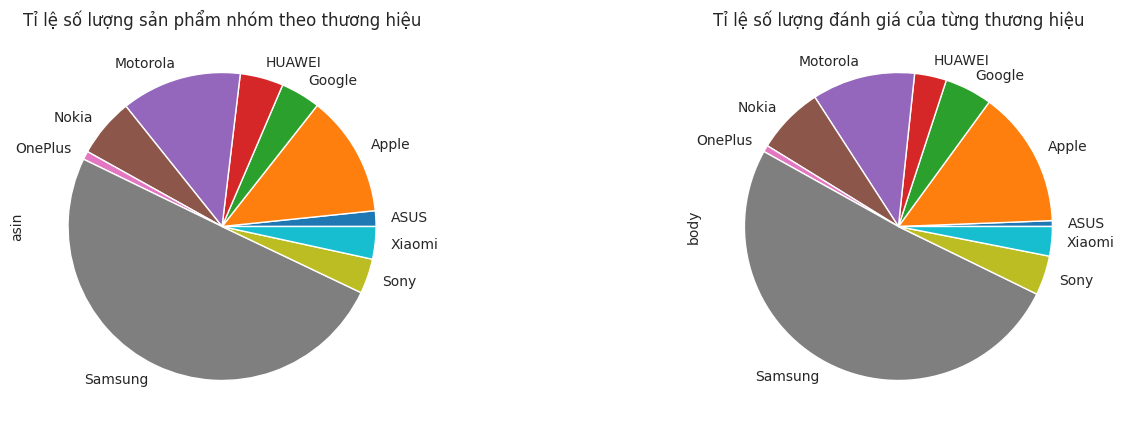

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
items.groupby("brand").count()["asin"].plot(kind="pie", ax=axes[0], title="Tỉ lệ số lượng sản phẩm nhóm theo thương hiệu")
reviews.groupby("brand").count()["body"].plot(kind="pie", ax=axes[1], title="Tỉ lệ số lượng đánh giá của từng thương hiệu")
plt.show()


***1. Có bao nhiêu phần trăm đánh giá là từ những khách hàng đã mua sản phẩm mà họ đánh giá tại Amazon?***


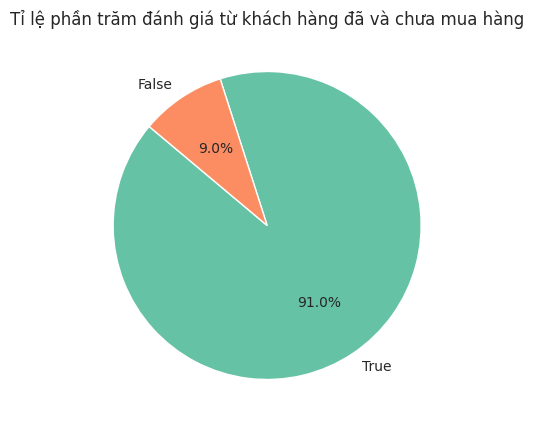

In [ ]:
verified_counts = reviews['verified'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"), wedgeprops={'edgecolor': 'white'})
plt.title("Tỉ lệ phần trăm đánh giá từ khách hàng đã và chưa mua hàng")
plt.show()

> 91% đánh giá là từ những khách hàng được xác nhận đã mua sản phẩm mà họ thực hiện đánh giá.

***2. Những cụm từ xuất hiện nhiều nhất trong các đánh giá là cụm từ nào? Những cụm từ đó thể hiện sự quan tâm đến vấn đề nào từ khách hàng?***


<Axes: >

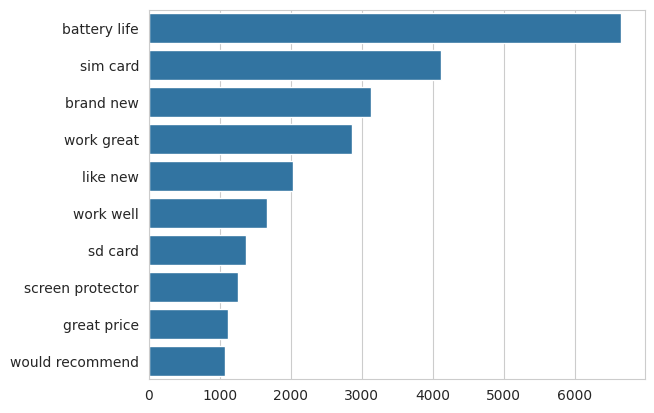

In [ ]:
top_bi_grams=get_top_ngram(reviews['clean_text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

* Cụm từ được quan tâm nhiều nhất là "battery life", tiếp đến là "sim card", "brand new" và "work great".
> Có vẻ khách hàng quan tâm nhiều đến vấn đề ở linh kiện của những chiếc điện thoại đặc biệt là tuổi thọ của pin, tiếp đến là về những thương hiệu mới và những lời khen cho hiệu năng, giá cả.


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
reviews['body_score'] = reviews['clean_text'].apply(lambda x: sid.polarity_scores(x))

reviews['tile_score'] = reviews['clean_title'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
reviews['polarity'] = reviews['body_score'].apply(lambda x: x['compound'])
reviews.drop('body_score', axis=1, inplace=True)

reviews['title_polarity'] = reviews['tile_score'].apply(lambda x: x['compound'])
reviews.drop('tile_score', axis=1, inplace=True)

In [ ]:
reviews.head()

verified                                         title  \
0     False                   Def not best, but not worst   
1     False                  Text Messaging Does not Work   
2     False                               Love This Phone   
3     False                       Love the Phone, BUT...!   
4     False  Great phone service and options, lousy case!   

                                                body  brand  \
0  I had the Samsung A600 for awhile which is abs...  Nokia   
1  Due to a software issue between Nokia and Spri...  Nokia   
2  This is a great, reliable phone. I also purcha...  Nokia   
3  I love the phone and all, because I really did...  Nokia   
4  The phone has been great for every purpose it ...  Nokia   

                                            name_pro  \
0  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
2  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
3  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
4  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   

                                          clean_text  \
0  awhile absolute doo doo read review detect rag...   
1  due software issue sprint text messaging capab...   
2  great reliable also purchased died menu easily...   
3  love really need one expect price bill receive...   
4  great every purpose offer except day bought it...   

                                 clean_title  polarity  title_polarity  
0                 def not best but not worst    0.8655          0.5035  
1                text messaging doe not work    0.8625          0.0000  
2                            love this phone    0.8779          0.6369  
3                         love the phone but    0.9136          0.3818  
4  great phone service and option lousy case    0.8850          0.1531

***3. Thương hiệu nào được đánh giá cao nhất, tích cực nhất?***

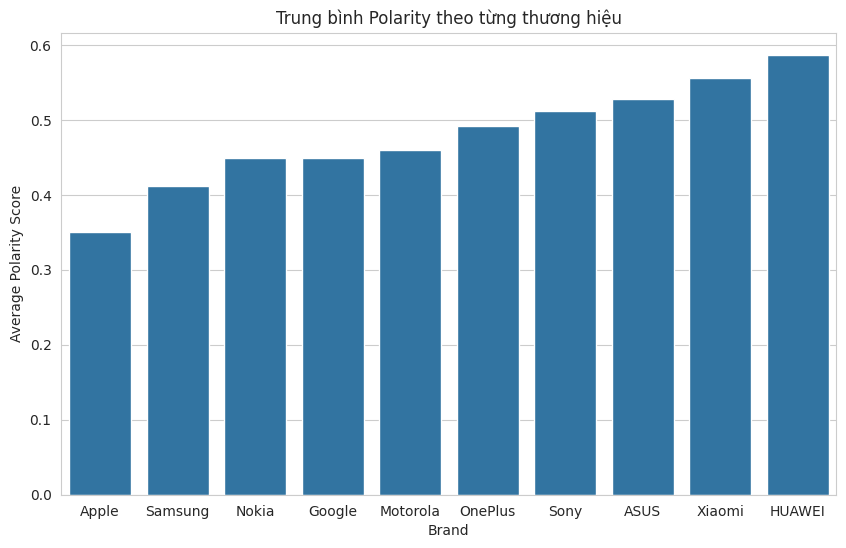

In [ ]:
polarity_by_brand = reviews.groupby('brand')['polarity'].mean().reset_index()
polarity_by_brand = polarity_by_brand.sort_values(by='polarity')
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='polarity', data=polarity_by_brand)
plt.title('Trung bình Polarity theo từng thương hiệu')
plt.xlabel('Brand')
plt.ylabel('Average Polarity Score')
plt.show()

>HUAWEI có đánh giá cao nhất/ tích cực nhất trong các thương hiệu.
* Vì vậy tiếp theo chúng ta sẽ chọn ra 3 thương hiệu để phân tích tiếp, trong đó 2 thương hiệu có nhiều đánh giá nhất đó là Samsung và Apple, 1 thương hiệu còn lại là HUAWEI.




***3. Độ dài của các đánh giá tập trung ở khoảng nào?***

***4. Độ dài đánh giá ảnh có ảnh hưởng gì đến độ tích cực và tiêu cực của đánh giá không?***

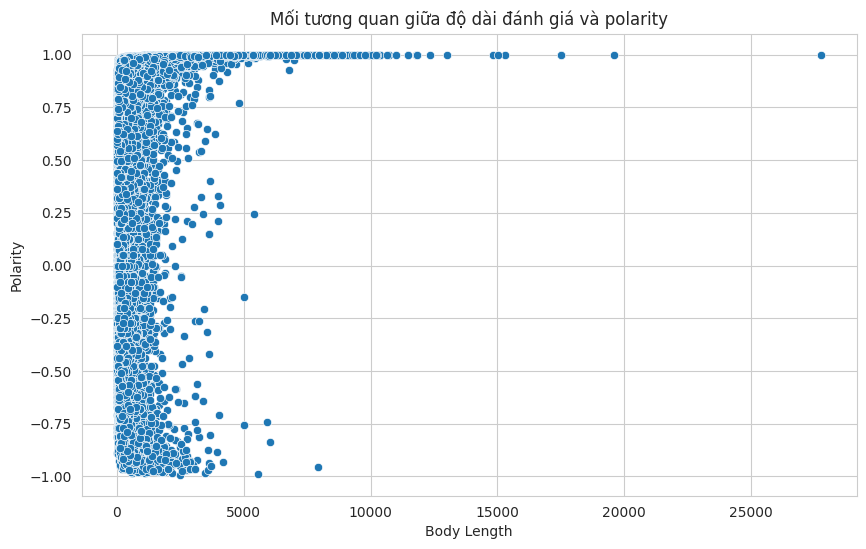

In [ ]:
reviews['body_length'] = reviews['body'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='body_length', y='polarity', data=reviews)
plt.title('Mối tương quan giữa độ dài đánh giá và polarity')
plt.xlabel('Body Length')
plt.ylabel('Polarity')
plt.show()



> Độ dài đánh giá thường tập trung ở khoảng 0 đến 5000 ký tự.

>Có mối tương quan giữa độ dài của đánh giá và giá trị polarity nhưng rất yếu. Các đánh giá có phần dài hơn thường mang tính chất tích cực hơn.



***5. Sự phân phối của polarity của đánh giá có thay đổi giữa các đánh giá được xác minh và không được xác minh không?***

<ipython-input-129-859fe5ada439>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(verified_polarity, label='Đánh giá được xác minh', shade=True)
<ipython-input-129-859fe5ada439>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unverified_polarity, label='Đánh giá không được xác minh', shade=True)


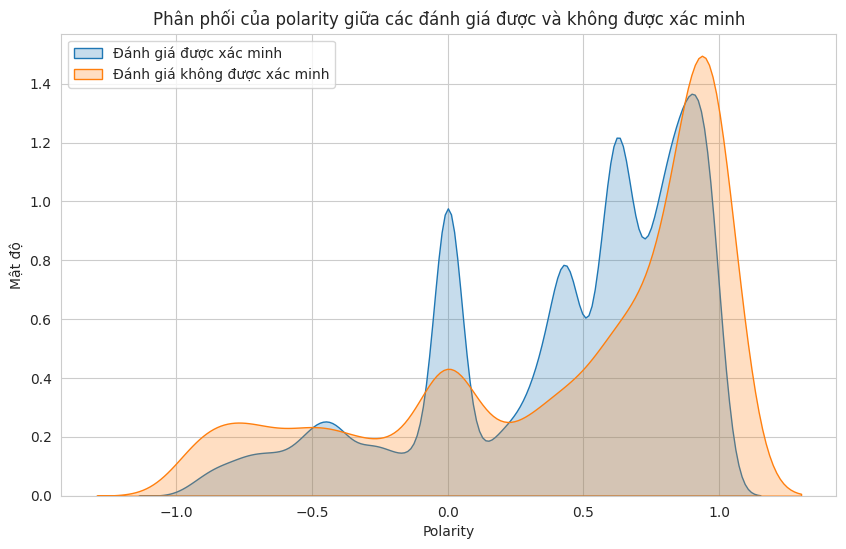

In [ ]:
verified_reviews = reviews[reviews['verified'] == True]
unverified_reviews = reviews[reviews['verified'] == False]

verified_polarity = verified_reviews['polarity']
unverified_polarity = unverified_reviews['polarity']

plt.figure(figsize=(10, 6))
sns.kdeplot(verified_polarity, label='Đánh giá được xác minh', shade=True)
sns.kdeplot(unverified_polarity, label='Đánh giá không được xác minh', shade=True)
plt.title('Phân phối của polarity giữa các đánh giá được và không được xác minh')
plt.xlabel('Polarity')
plt.ylabel('Mật độ')
plt.legend(loc='upper left')
plt.show()


> Sự phân phối của polarity của các đánh giá có sự khác biệt giữa hai nhóm được xác minh và không được xác minh. Các đánh giá được xác minh thường tích cực và tập trung hơn, trong khi các đánh giá không được xác minh có xu hướng phân tán hơn về mức độ tích cực/tiêu cực.

***6. Liệu họ có xu hướng viết tiêu đề tích cực/tiêu cực trước để gây ấn tượng ban đầu hay không?***

In [ ]:
reviews['title_sentiment'] = np.where(reviews['title_polarity'] >0, 'positive',
                                      np.where(reviews['title_polarity'] <0, 'negative', 'neutral'))

reviews['body_sentiment'] = np.where(reviews['polarity'] >0, 'positive',
                                     np.where(reviews['polarity'] <0, 'negative', 'neutral'))

reviews['sentiment_match'] = np.where(reviews['title_sentiment'] == reviews['body_sentiment'], True, False)

print("Khi tiêu đề và đánh giá cùng cảm xúc:")
print(reviews[reviews['sentiment_match'] == True]['title_sentiment'].value_counts(normalize=True))

print("\nKhi tiêu đề và đánh giá khác cảm xúc:")
print(reviews[reviews['sentiment_match'] == False]['title_sentiment'].value_counts(normalize=True))

Khi tiêu đề và đánh giá cùng cảm xúc:
positive    0.758537
neutral     0.130337
negative    0.111126
Name: title_sentiment, dtype: float64

Khi tiêu đề và đánh giá khác cảm xúc:
neutral     0.722052
negative    0.166013
positive    0.111936
Name: title_sentiment, dtype: float64


> Ta có thể thấy xu hướng chung là khách hàng thường viết tiêu đề tích cực hơn khi họ nhất quán về cảm xúc trong cả tiêu đề và nội dung, có thể để gây ấn tượng ban đầu. Tuy nhiên, khi có sự khác biệt về cảm xúc, khách hàng có xu hướng viết tiêu đề trung tính hoặc một tỷ lệ nhỏ viết tiêu đề tiêu cực để gây ấn tượng ban đầu.

In [ ]:
review_pos = reviews[reviews["polarity"] > 0]
review_neg = reviews[reviews["polarity"] < 0]

In [ ]:
apple_review_pos = review_pos[review_pos["brand"] == "Apple"]
apple_review_neg = review_neg[review_neg["brand"] == "Apple"]

samsung_review_pos = review_pos[review_pos["brand"] == "Samsung"]
samsung_review_neg = review_neg[review_neg["brand"] == "Samsung"]

huawei_review_pos = review_pos[review_pos["brand"] == "HUAWEI"]
huawei_review_neg = review_neg[review_neg["brand"] == "HUAWEI"]

In [ ]:
def process_reviews(reviews_pos_df, reviews_neg_df):
    grouped_reviews_pos = reviews_pos_df[['name_pro', 'clean_text']].groupby(by='name_pro').agg(lambda x: ' '.join(x))
    cv = CountVectorizer(analyzer='word')
    data_pos = cv.fit_transform(grouped_reviews_pos['clean_text'])
    dtm_pos = pd.DataFrame(data_pos.toarray(), columns=cv.get_feature_names_out())
    dtm_pos.index = grouped_reviews_pos.index

    grouped_reviews_neg = reviews_neg_df[['name_pro', 'clean_text']].groupby(by='name_pro').agg(lambda x: ' '.join(x))
    cv = CountVectorizer(analyzer='word')
    data_neg = cv.fit_transform(grouped_reviews_neg['clean_text'])
    dtm_neg = pd.DataFrame(data_neg.toarray(), columns=cv.get_feature_names_out())
    dtm_neg.index = grouped_reviews_neg.index

    return dtm_pos, dtm_neg

apple_pos_dtm, apple_neg_dtm = process_reviews(apple_review_pos, apple_review_neg)
samsung_pos_dtm, samsung_neg_dtm = process_reviews(samsung_review_pos, samsung_review_neg)
huawei_pos_dtm, huawei_neg_dtm = process_reviews(huawei_review_pos, huawei_review_neg)

In [ ]:
review_grouped=reviews[['brand','clean_text']].groupby(by='brand').agg(lambda x:' '.join(x))
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(review_grouped['clean_text'])
review_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
review_dtm.index=review_grouped.index

In [ ]:
from wordcloud import WordCloud

#hàm vẽ wordcloud theo brand
def draw_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

#hàm vẽ worldcloud pos và neg
def plot_wordcloud(dtm, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dtm.sum())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

#hàm sẽ biểu đồ tần số
def topn_wordfreq_bar_both(pos_dtm, neg_dtm, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    pos_freq = pos_dtm.sum(axis=0)
    neg_freq = neg_dtm.sum(axis=0)

    df_pos = pd.DataFrame(pos_freq, columns=["frequency"]).sort_values(by="frequency", ascending=False).head(topn)
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"

    df_neg = pd.DataFrame(neg_freq, columns=["frequency"]).sort_values(by="frequency", ascending=False).head(topn)
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"

    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)

    sns.catplot(x="index", y="frequency", hue="label", data=df_append,
                kind="bar",
                palette=palette,
                height=height, aspect=aspect,
                legend_out=False)

    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()

***7. Yếu tố nào (thiết kế, hiệu năng, camera, pin, giá cả, v.v.) được nhắc đến nhiều nhất trong đánh giá của mỗi thương hiệu?***

***8. Có sự khác biệt nào giữa các đánh giá tích cực và tiêu cực của từng thương hiệu không?***

***9. Những từ khóa xuất hiện phổ biến ở các đánh giá tích cực có thể mang ý nghĩa cụ thể nào không?***

***10. Từ khóa nào xuất hiện nhiều nhất trong các đánh giá tiêu cực của cả ba thương hiệu?***

***11. Có từ khóa nào xuất hiện ở cả hai loại đánh giá nhưng có tần suất tiêu cực lớn hơn nhiều của mỗi thương hiệu không? Liệu có thể dự đoán các vấn đề tiềm ẩn cho các sản phẩm mới không?***

Những từ khóa nào xuất hiện nhiều nhất trong các đánh giá của khác hàng đối với thương hiệu Apple? Từ đó có thể suy ra những chủ đề/đặc điểm chính gì được nhắc đến trong đánh giá?


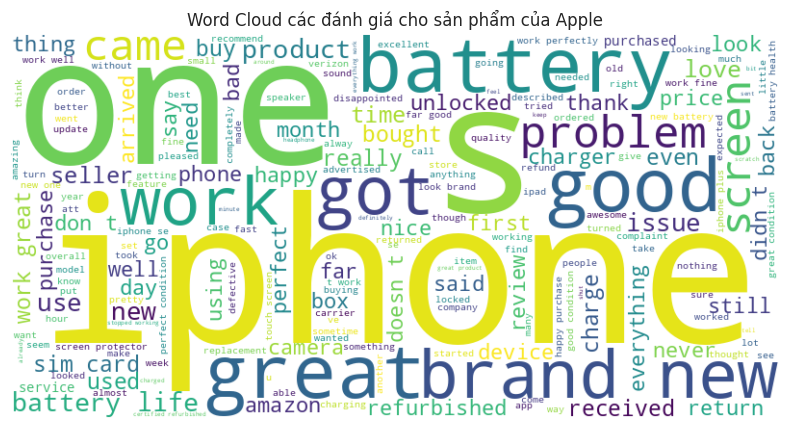

In [ ]:
apple_reviews = review_grouped.loc["Apple", "clean_text"]
draw_wordcloud(apple_reviews, "Word Cloud các đánh giá cho sản phẩm của Apple")

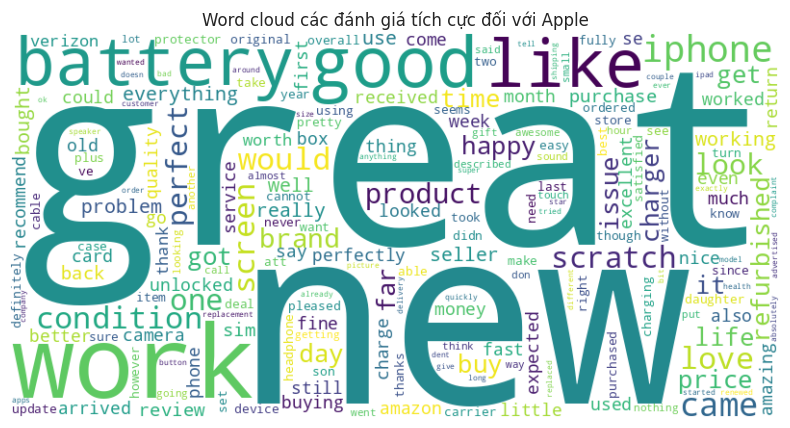

In [ ]:
plot_wordcloud(apple_pos_dtm, 'Word cloud các đánh giá tích cực đối với Apple')

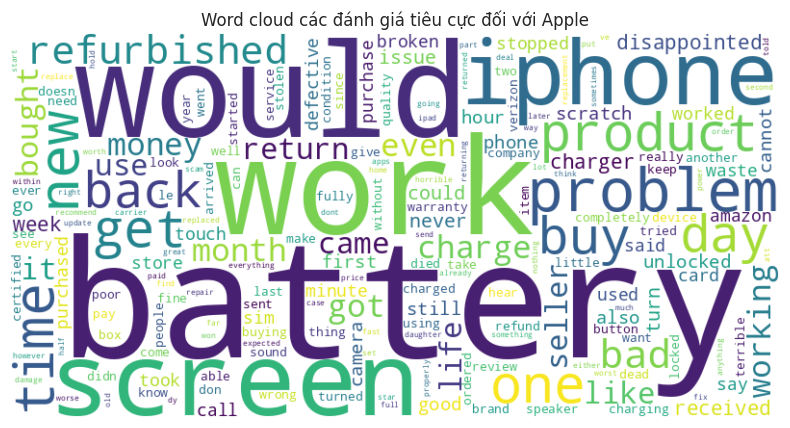

In [ ]:
plot_wordcloud(apple_neg_dtm, 'Word cloud các đánh giá tiêu cực đối với Apple')

<ipython-input-135-c944ee3e39e0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


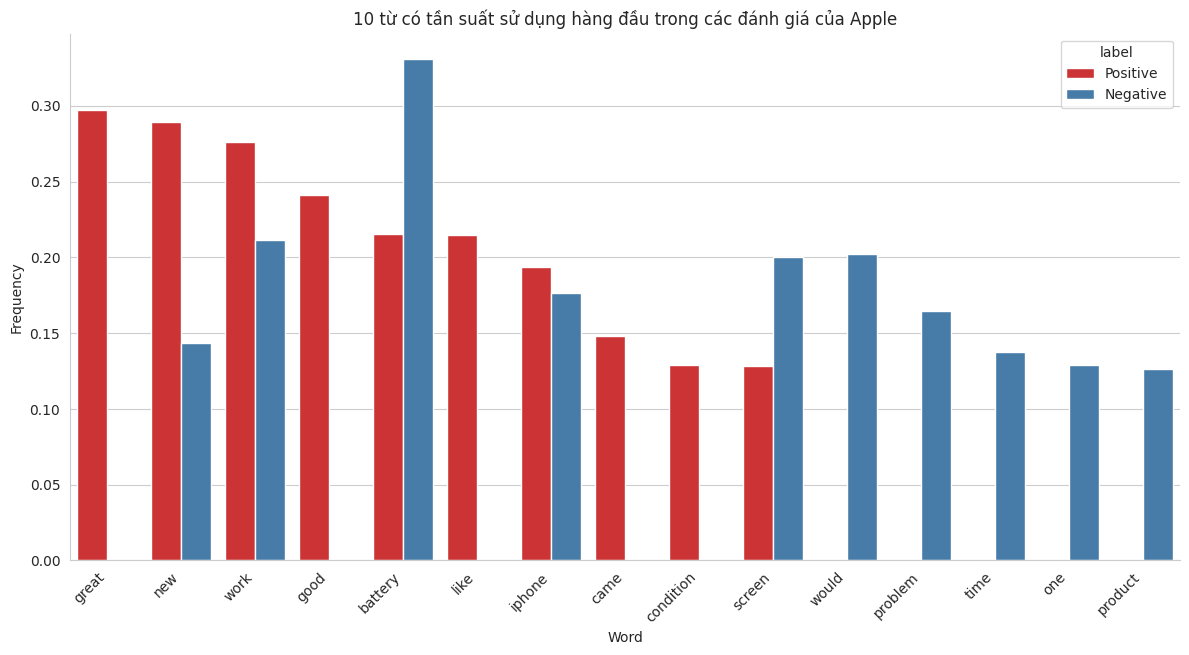

In [ ]:
topn_wordfreq_bar_both(apple_pos_dtm, apple_neg_dtm, len(apple_review_pos), len(apple_review_neg), 10, "10 từ có tần suất sử dụng hàng đầu trong các đánh giá của Apple", "Set1")

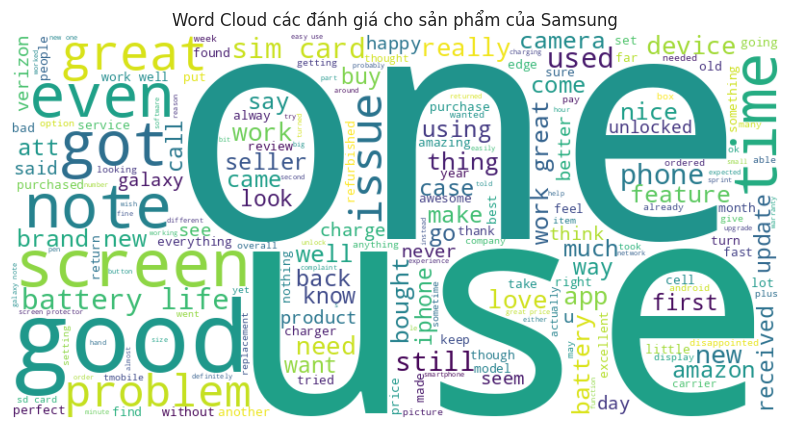

In [ ]:
samsung_reviews = review_grouped.loc["Samsung", "clean_text"]
draw_wordcloud(samsung_reviews, "Word Cloud các đánh giá cho sản phẩm của Samsung")

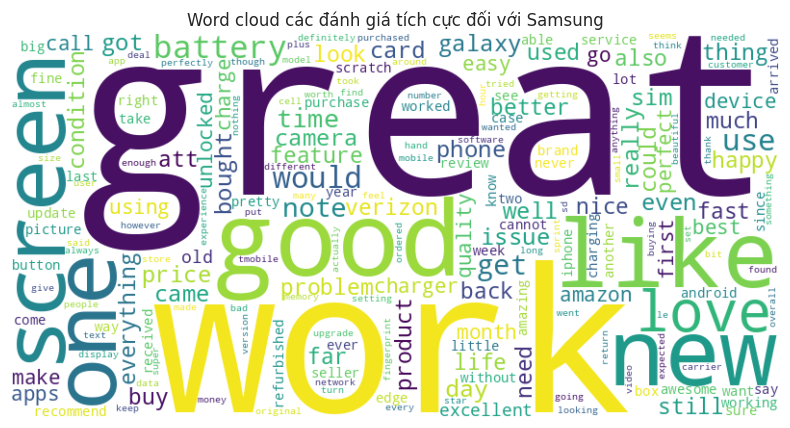

In [ ]:
plot_wordcloud(samsung_pos_dtm, 'Word cloud các đánh giá tích cực đối với Samsung')

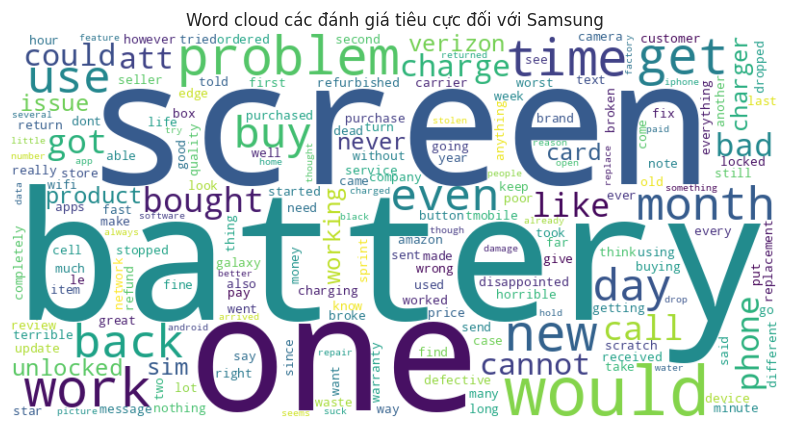

In [ ]:
plot_wordcloud(samsung_neg_dtm, 'Word cloud các đánh giá tiêu cực đối với Samsung')

<ipython-input-135-c944ee3e39e0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


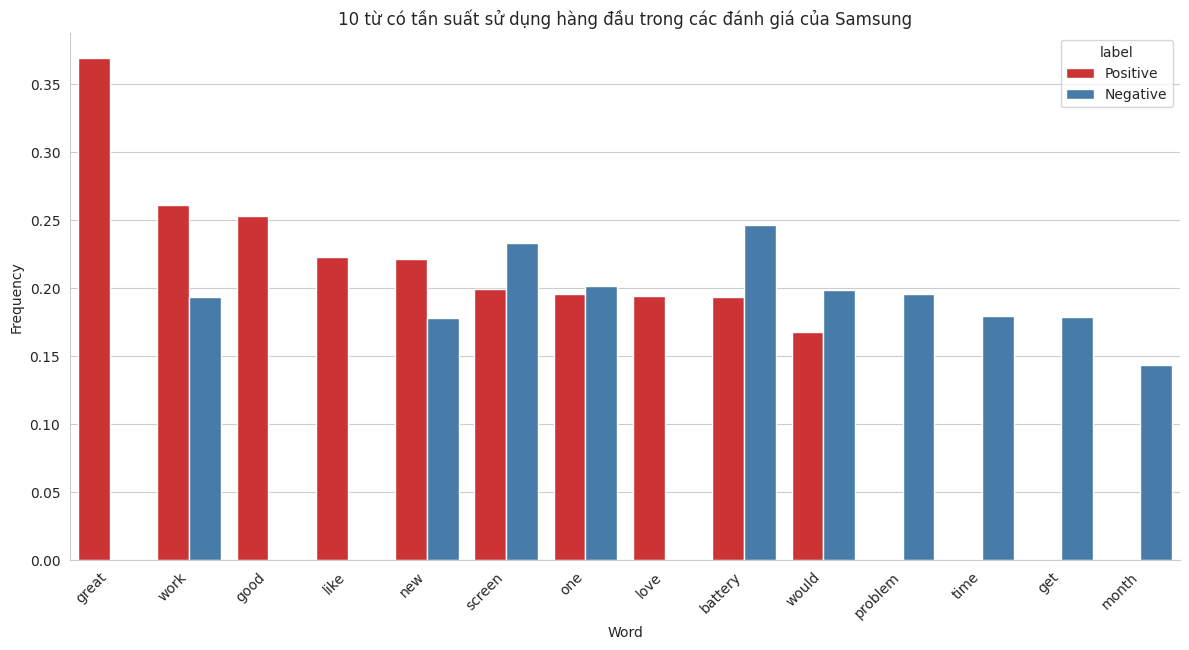

In [ ]:
topn_wordfreq_bar_both(samsung_pos_dtm, samsung_neg_dtm, len(samsung_review_pos), len(samsung_review_neg), 10, "10 từ có tần suất sử dụng hàng đầu trong các đánh giá của Samsung", "Set1")

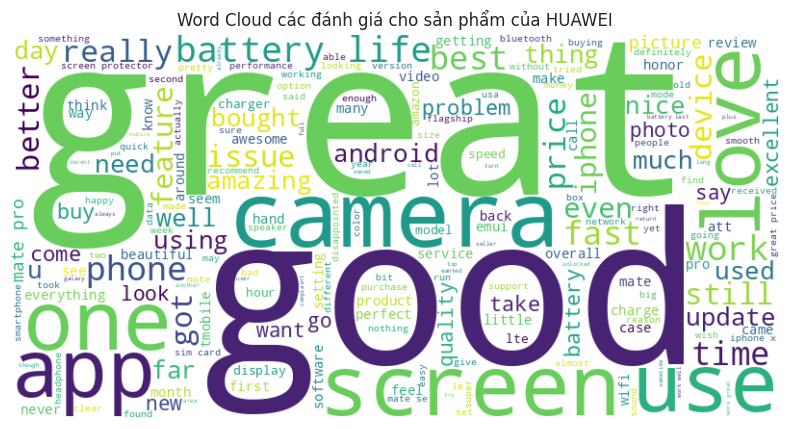

In [ ]:
huawei_reviews = review_grouped.loc["HUAWEI", "clean_text"]
draw_wordcloud(huawei_reviews, "Word Cloud các đánh giá cho sản phẩm của HUAWEI")

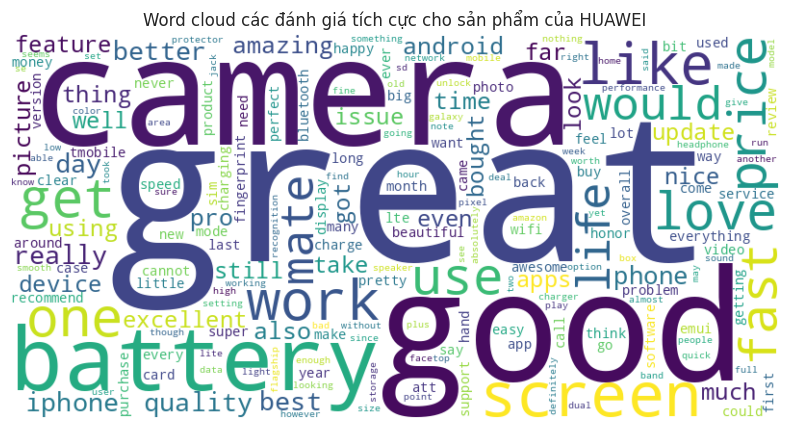

In [ ]:
plot_wordcloud(huawei_pos_dtm, 'Word cloud các đánh giá tích cực cho sản phẩm của HUAWEI')

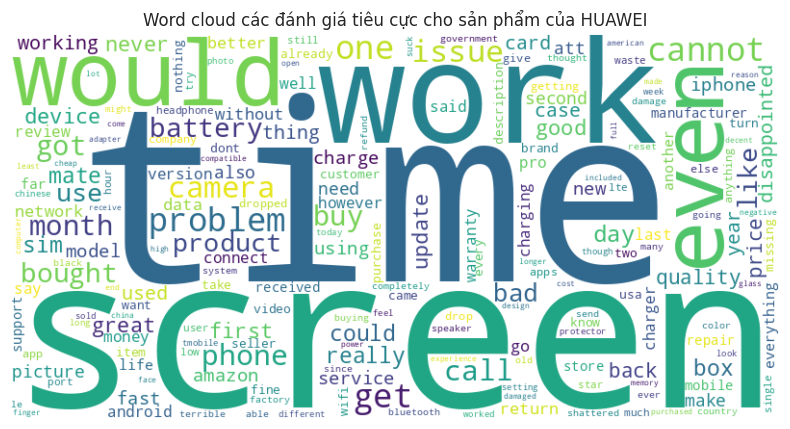

In [ ]:
plot_wordcloud(huawei_neg_dtm, 'Word cloud các đánh giá tiêu cực cho sản phẩm của HUAWEI')

<ipython-input-135-c944ee3e39e0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


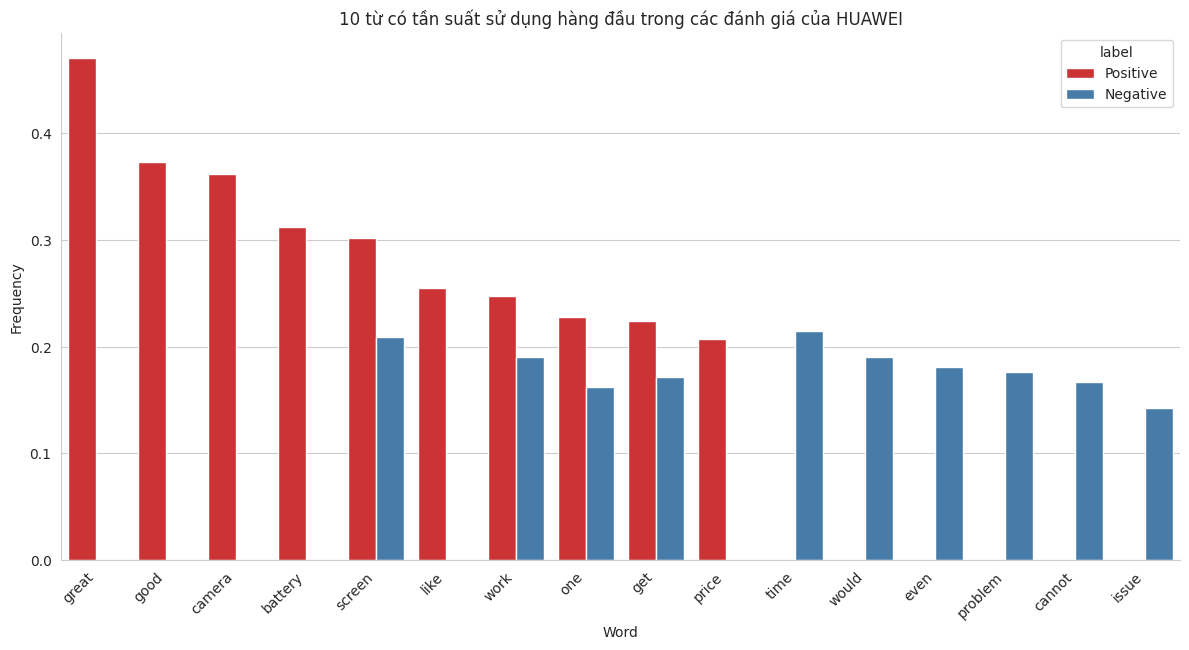

In [ ]:
topn_wordfreq_bar_both(huawei_pos_dtm, huawei_neg_dtm, len(huawei_review_pos), len(huawei_review_neg), 10, "10 từ có tần suất sử dụng hàng đầu trong các đánh giá của HUAWEI", "Set1")

> 7:
- Apple: dòng sản phẩm "iphone" được nhắc đến nhiều nhất trong các đánh giá, tiếp đến là vấn đề về pin(battery), và hiệu năng (work).
- Samsung: vấn đề về sử dụng(use) và màn hình(screen) được nhắc đến nhiều nhất ở đây.
- HUAWEI: ngoài những từ ngữ khen ngợi như "great" và "good", vấn đề về màn hình(screen), máy ảnh(camera), pin(battery) và giá cả(price) là nhắc đến nhiều nhất.

> 8:
Ở Apple và Samsung thì "battery" đều xuất hiện ở các đánh giá tích cực và tiêu cực, đặc biệt ở tiêu cực còn có tần suất lớn hơn. Nhưng các sản phẩm của HUAWEI, từ khóa "battery" chỉ xuất hiện ở các đánh giá tích cực.
* Điều này có thể cho thấy rằng khách hàng đánh giá rất cao về chất lượng/tuổi thọ pin ở sản phẩm của HUAWEI.

>9:
- Apple: Trong những đánh giá tích cực xuất hiện phổ từ khóa "great" là điều khá dễ hiểu. Từ "work" thì có thể hiệu năng xuất làm việc của những sản phẩm này được đánh giá tốt. Còn về từ khóa "new", để hiểu thêm về nó ta đặt ra câu hỏi số 12.
- Samsung: Từ khóa "work" và "great" ở đây cũng tương tự như ở Apple.
- HUAWEI: ở đây ngoài những từ có ý nghĩa khen ngợi, có xuất hiện thêm các từu khóa như "camera, screen, battery" cho thấy khách hàng đánh giá cao về chất lượng linh kiện, tính năng của HUAWEI.

> 10: Nếu nói đến từ khóa xuất hiện nhiều ở đánh giá tiêu cực của cả 3 thương hiệu thì đó là từ "screen".

> 11: "battery" và "screen" là 2 từ khóa xuất hiện nhiều trong cả đánh giá tích cực và tiêu cực của cả 3 sản phẩm, đặc biệt là ở Apple và Samsung khi tần suất tiêu cực cao hơn tích cực. Cho thấy đây có thể là những vấn đề chung mà các nhà sản xuất cần lưu ý và cải thiện trong các sản phẩm mới.

***12. Từ khóa "new" ta đặt ra câu hỏi nó xuất hiện nhiều trên những sản phẩm nào của Apple? Qua đó có thể thấy được khách hàng có cái nhìn tích cực về vấn đề gì không?***


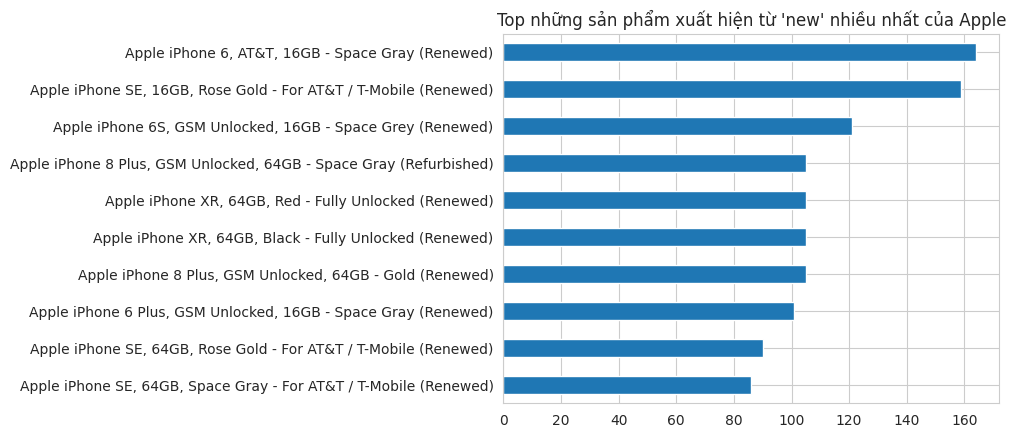

In [ ]:
apple = reviews[reviews["brand"]=="Apple"]
apple[apple["clean_text"].apply(lambda x: "new" in x)]["name_pro"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Top những sản phẩm xuất hiện từ 'new' nhiều nhất của Apple")
plt.show()

In [ ]:
apple_copy = apple.copy()
apple_copy["renewed"] = apple_copy["name_pro"].apply(lambda x: ("Renewed" in x) or ("Reburshied" in x))
renewed_percentage = (apple_copy["renewed"].sum() / len(apple_copy["renewed"])) * 100
print("{0:.1f}% sản phẩm được bán của Apple là renewed/reburshied.".format(renewed_percentage))


96.5% sản phẩm được bán của Apple là renewed/reburshied.


> 12: Khi đi sâu vào từ khóa "new", ta có thể thấy rằng khác hàng đánh giá cao những sản phẩm đã được làm mới lại (Renewed,Reburshied) trước khi bán, và có 96.5% sản phẩm của Apple được bán ở đây đã được tân trang, làm mới trước khi bán.

# Kết luận

---
Nhìn chung khách hàng có phần lớn có đánh giá tích cự đối với các sản phẩm điện thoại được bán trên Amazon. Hai thương hiệu phổ biến nhất là Samsung và Apple.
 Trong số tất cả các thương hiệu thì HUAWEI là được đánh giá cao nhất
 - Hơn 96% sản phẩm được bán của hãng Apple là những sản phẩm đã được tân trang và làm mới lại trước khi bán ra, người mua hài lòng với những sản phẩm này và sẽ đưa ra lời phàn nàn nếu như thấy các vấn đề liên quan đến màn hình và tuổi thọ pin.
 - Người mua Samsung nói chung hài lòng về sản phẩm đặc biệt khi nói đến hiệu năng. Tương tự Apple, khiếu nại của khách hàng cũng chủ yếu về màn hình và pin.
 - Đối với HUAWEI, thương hiệu được đánh giá cao nhất ở đây, người mua thể hiện sự đánh giá cao đặc biệt là ở máy ảnh, pin và giá cả. Một số khách hàng phàn nàn về màn hình và hiệu năng nhưng nó là không bao nhiêu so với những lời khen.


---
=> Qua phân tích tôi có đưa ra một vài khuyến nghị:
- Đối với Amazon và bên thứ ba(người bán): Nên tăng cường việc kiểm tra chất lượng và độ tin cậy của các sản phẩm đã được tân trang và làm mới lại trước khi bán ra. Nên cung cấp thông tin chi tiết và đáng tin cậy về sản phẩm, điểm mạnh và điểm yếu của sản phẩm, đặc biệt là các thông số kỹ thuật liên quan đến màn hình và pin, để khách hàng có thể đưa ra quyết định mua hàng chính xác hơn. Điều này có thể làm tăng những đánh giá tích cực, nâng cao lòng tin của khách hàng.
- Đối các thương hiệu/ hãng điện thoại: Nên tiếp tục tập trung vào việc cải thiện chất lượng màn hình, tuổi thọ pin, chất lượng camera và hiệu năng của sản phẩm. Vì đây là những vấn đề được quan tâm nhiều nhất trên chiếc điện thoại, đặc biệt là tuổi thọ pin. Điều này sẽ giúp làm tăng trải nghiệm người dùng, giảm những đánh giá tiêu cực từ khách hàng.